<a href="https://colab.research.google.com/github/dntwaritag/Climate-Resilience/blob/main/Summative_Intro_to_ml_Denys_Ntwaritaganzwa_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization Techniques in Machine Learning

## Objective: Implementation of Machine Learning Models with regularization, optimization, and error analysis to improve performance, convergence speed, and efficiency.

**Step 1: Import Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping
import os

In [2]:
# Ensure directory exists to save models
os.makedirs("saved_models", exist_ok=True)

**Step 2: Load Dataset**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Mathematics for Machine Learning/seattle-weather.csv')
print("Dataset Shape:", df.shape)
print("\nFirst few rows of the dataset:")
print(df.head())

Dataset Shape: (1461, 6)

First few rows of the dataset:
         date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain


**Step 3: Data Preprocessing**

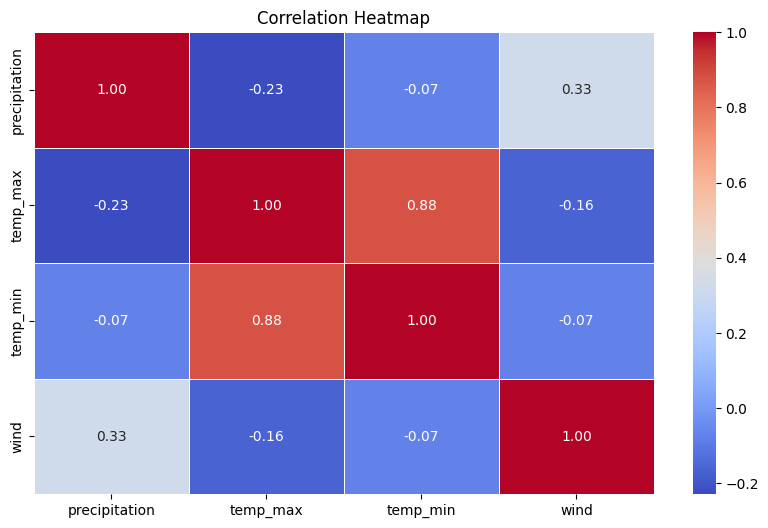

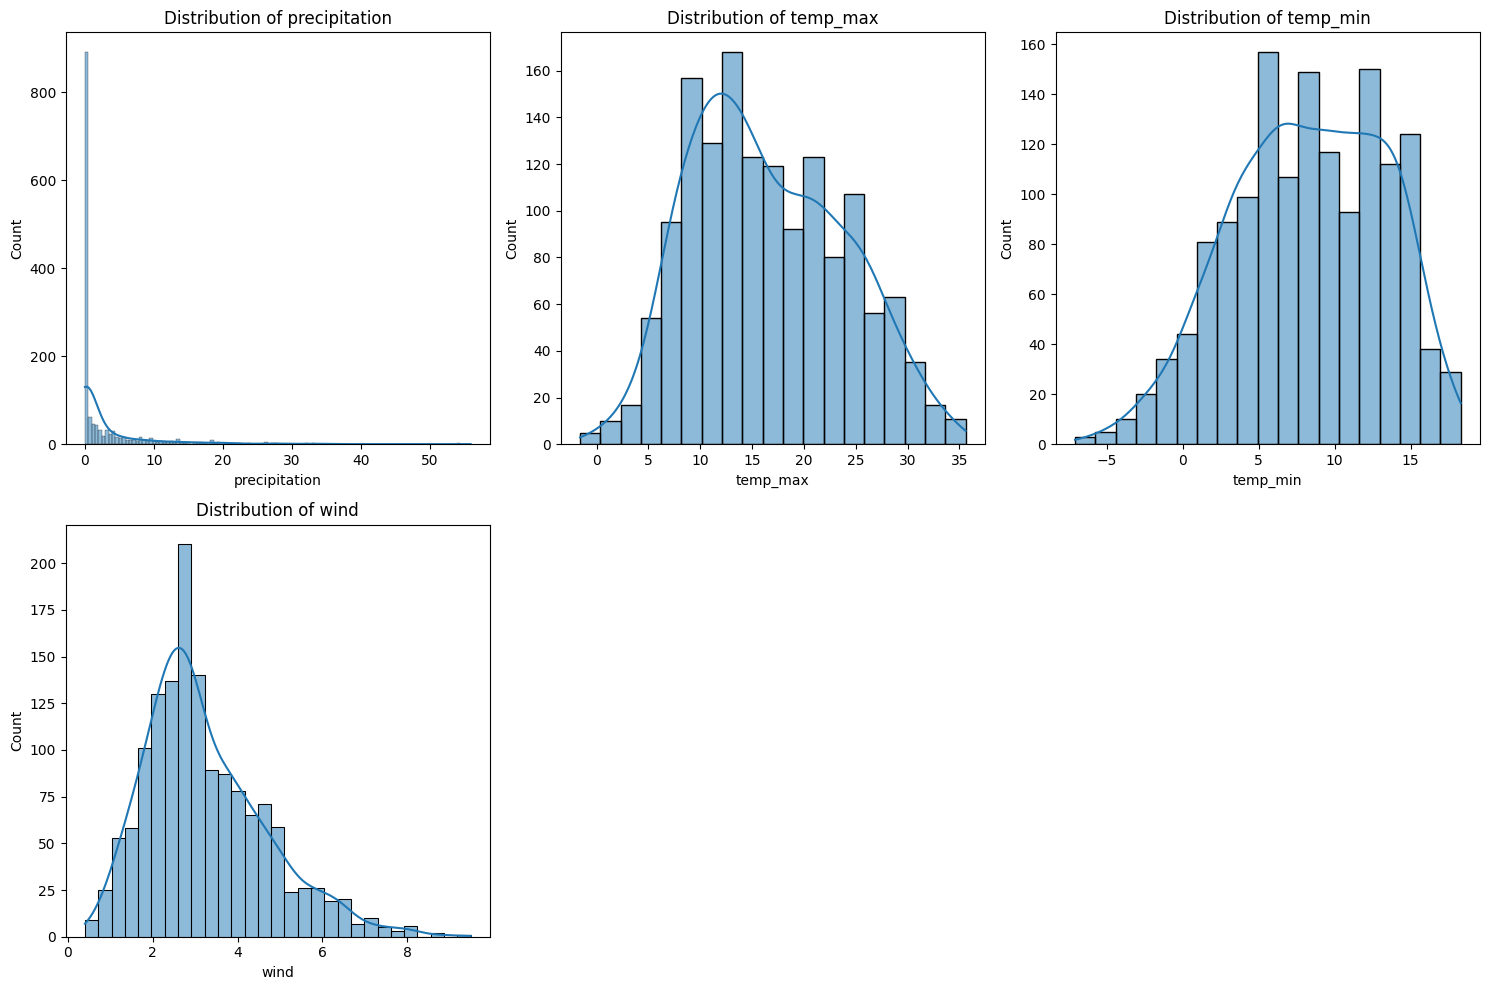

In [7]:
# Data Preprocessing
# Convert categorical 'weather' column to numeric values using Label Encoding
df['weather'] = LabelEncoder().fit_transform(df['weather'])

# Define feature variables (X) and target variable (y)
X = df.drop(columns=['weather', 'date'])
y = df['weather']

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Distribution of features
plt.figure(figsize=(15, 10))
for i, column in enumerate(X.columns[:5], 1):
    plt.subplot(2, 3, i)
    sns.histplot(X[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

**Step 4: Split the dataset into Training (80%), Validation (10%), and Test (10%)**

In [8]:
# Split the dataset into Training (80%), Validation (10%), and Test (10%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize feature variables for better performance in ML models
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

**Step 5: Baseline Logistic Regression Model**

In [9]:
# Baseline Logistic Regression Model
model_log_reg = LogisticRegression(max_iter=1000)
model_log_reg.fit(X_train, y_train)
y_pred_log_reg = model_log_reg.predict(X_test)

print("\nLogistic Regression Model Evaluation")
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")


Logistic Regression Model Evaluation
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00        12
           2       0.85      0.83      0.84        63
           3       0.00      0.00      0.00         3
           4       0.67      0.94      0.78        62

    accuracy                           0.75       147
   macro avg       0.31      0.35      0.32       147
weighted avg       0.65      0.75      0.69       147

Confusion Matrix:
 [[ 0  0  0  0  7]
 [ 0  0  2  0 10]
 [ 0  0 52  0 11]
 [ 0  0  3  0  0]
 [ 0  0  4  0 58]]
Accuracy: 0.7483


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Step 6: Define a Function to Create and Train Neural Network Models**

In [13]:
# Define a Function to Create and Train Neural Network Models
def build_model(optimizer, learning_rate, regularization=None, dropout_rates=None, early_stopping=False):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],), name='input_layer'))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(regularization) if regularization else None, name='hidden_layer_1'))
    if dropout_rates:
        model.add(Dropout(dropout_rates[0], name='dropout_1'))
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(regularization) if regularization else None, name='hidden_layer_2'))
    if dropout_rates and len(dropout_rates) > 1:
        model.add(Dropout(dropout_rates[1], name='dropout_2'))
    model.add(Dense(16, activation='relu', kernel_regularizer=l2(regularization) if regularization else None, name='hidden_layer_3'))
    model.add(Dense(len(np.unique(y_train)), activation='softmax', name='output_layer')) # Changed output layer to softmax and number of neurons equal to number of classes.

    opt = optimizer(learning_rate=learning_rate)
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) # Changed loss to sparse_categorical_crossentropy

    callbacks = [EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)] if early_stopping else []

    return model, callbacks

**Step 7: Train Multiple Neural Network Model Instances**

In [14]:
# Train Multiple Neural Network Model Instances
models = [
    ('Instance_1', Adam, 0.001, None, None, False),
    ('Instance_2', Adam, 0.001, 0.01, None, True),
    ('Instance_3', SGD, 0.01, None, [0.3, 0.2], False),
    ('Instance_4', RMSprop, 0.0005, 0.005, [0.3, 0.2], True)
]

trained_models = {}
for name, opt, lr, reg, dropout, early_stop in models:
    print(f"\nTraining {name}...")
    model, callbacks = build_model(opt, lr, reg, dropout, early_stop)
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, callbacks=callbacks)
    trained_models[name] = (model, history)


Training Instance_1...
Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.4406 - loss: 1.4724 - val_accuracy: 0.4863 - val_loss: 1.1404
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5078 - loss: 1.1504 - val_accuracy: 0.7055 - val_loss: 1.0199
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7187 - loss: 0.9551 - val_accuracy: 0.7329 - val_loss: 0.9037
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7332 - loss: 0.8997 - val_accuracy: 0.7740 - val_loss: 0.8096
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7587 - loss: 0.7937 - val_accuracy: 0.7603 - val_loss: 0.7417
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7815 - loss: 0.7001 - val_accuracy: 0.7740 - val_loss: 0.6878
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7753 - loss: 0.7224 - val_accuracy: 0.7603 - val_loss: 0.6766
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7632 - loss: 0.6993 - val_acc

**Step 8: Evaluate Neural Network Models**

In [16]:
# Evaluate Neural Network Models
for name, (model, history) in trained_models.items():
    print(f"\nEvaluating {name}...")
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1) # Get the class with the highest probability
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print(f"{name} - Accuracy: {accuracy_score(y_test, y_pred):.4f}, Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}, Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}, F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")


Evaluating Instance_1...
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00        12
           2       0.92      0.87      0.89        63
           3       0.00      0.00      0.00         3
           4       0.72      0.98      0.83        62

    accuracy                           0.79       147
   macro avg       0.33      0.37      0.34       147
weighted avg       0.70      0.79      0.73       147

Confusion Matrix:
 [[ 0  0  0  0  7]
 [ 0  0  1  0 11]
 [ 0  0 55  2  6]
 [ 0  0  3  0  0]
 [ 0  0  1  0 61]]
Instance_1 - Accuracy: 0.7891, Precision: 0.6955, Recall: 0.7891, F1-Score: 0.7333

Evaluating Instance_2...
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00        12
           2       0.91      0.83      0.87        63
           3       0.00      0.00      0.00         3
           4       0.68      0.98      0.80        62

    accuracy                           0.77       147
   macro avg       0.32      0.36      0.33       147
weighted avg       0.68      0.77      0.71       147

Confusion Matrix:
 [[ 0  0  0  0  7]
 [ 0  0  1  0 11]
 [ 0  0 52  0 11]
 [ 0  0  3  0  0]
 [ 0  0  1  0 61]]
Instance_2 - Accuracy: 0.7687, Precision: 0.6768, Recall: 0.7687, F1-Score: 0.7100

Evaluating Instance_3...
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00        12
           2       0.83      0.86      0.84        63
           3       0.00      0.00      0.00         3
           4       0.70      0.92      0.79        62

    accuracy                           0.76       147
   macro avg       0.31      0.36      0.33       147
weighted avg       0.65      0.76      0.70       147

Confusion Matrix:
 [[ 0  0  1  0  6]
 [ 0  0  2  0 10]
 [ 0  0 54  0  9]
 [ 0  0  3  0  0]
 [ 0  0  5  0 57]]
Instance_3 - Accuracy: 0.7551, Precision: 0.6492, Recall: 0.7551, F1-Score: 0.6955

Evaluating Instance_4...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00        12
           2       0.86      0.89      0.88        63
           3       0.00      0.00      0.00         3
           4       0.71      0.94      0.81        62

    accuracy                           0.78       147
   macro avg       0.31      0.36      0.34       147
weighted avg       0.67      0.78      0.71       147

Confusion Matrix:
 [[ 0  0  0  0  7]
 [ 0  0  2  0 10]
 [ 0  0 56  0  7]
 [ 0  0  3  0  0]
 [ 0  0  4  0 58]]
Instance_4 - Accuracy: 0.7755, Precision: 0.6676, Recall: 0.7755, F1-Score: 0.7148


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

**Step 9: Save Models**

In [17]:
# Save Models
for name, (model, _) in trained_models.items():
    model.save(f"saved_models/{name}.h5")

**Step 10: Generate Neural Network Diagram**

In [18]:
# Generate Neural Network Diagram
from tensorflow.keras.utils import plot_model
plot_model(trained_models['Instance_4'][0], to_file='Neural_Network_Diagram.png', show_shapes=True, show_layer_names=True)
print("\nNeural Network Diagram saved as 'Neural_Network_Diagram.png'.")


Neural Network Diagram saved as 'Neural_Network_Diagram.png'.


**Step 11: Plot Training History**

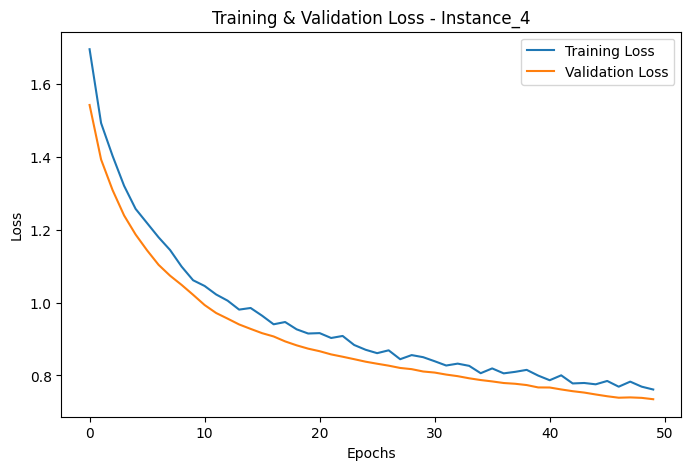

In [21]:
# Plot training history for each instance
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title(f'Training & Validation Loss - {name}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

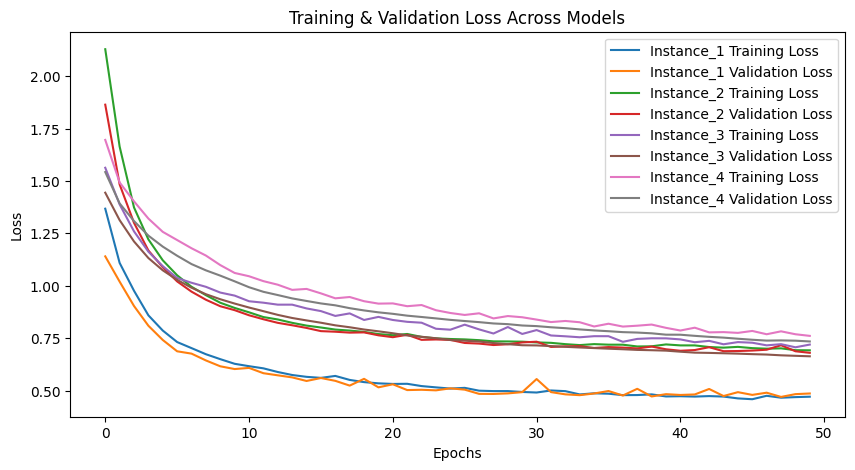


All models have been saved successfully.


In [19]:
# Plot Training History
plt.figure(figsize=(10, 5))
for name, (_, history) in trained_models.items():
    plt.plot(history.history['loss'], label=f'{name} Training Loss')
    plt.plot(history.history['val_loss'], label=f'{name} Validation Loss')
plt.title('Training & Validation Loss Across Models')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("\nAll models have been saved successfully.")


In [22]:
from tensorflow.keras.utils import plot_model
plot_model(trained_models['Instance_4'][0], to_file='Neural_Network_Diagram.png', show_shapes=True, show_layer_names=True)
print("\nNeural Network Diagram saved as 'Neural_Network_Diagram.png'.")

print("\nAll models have been saved successfully.")



Neural Network Diagram saved as 'Neural_Network_Diagram.png'.

All models have been saved successfully.
